In [1]:
import os
import sys
import torch
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import math


from loss_comparison import Comparison
from data_generator import DataGenerator

In [2]:
from sklearn.manifold import TSNE
from myutils import Utils

utils = Utils()

In [3]:
# 真实数据集列表
dataset_list = [os.path.splitext(_)[0] for _ in os.listdir(os.path.join(os.getcwd(), 'datasets', 'new'))
                if os.path.splitext(_)[-1] != '.md']



loss_name_dict = {'Hinge':'hinge_loss', 'Deviation':'deviation_loss', 'Ordinal':'ordinal_loss',
                  'Inverse':'inverse_loss', 'Minus':'minus_loss', 'SDAD':'score_distribution_loss'}

color_dict = {}

for i,k in enumerate(loss_name_dict.keys()):
    
    if k == 'Deviation':
        c = '#e29c45'
    elif k == 'Ordinal':
        c = 'darkgreen'
    else:
        c = "C{}".format(i)
        
    color_dict[k] = c
    
marker_dict = {'Hinge':'P', 'Deviation':'^', 'Ordinal':'v', 'Inverse':'o', 'Minus':'s', 'SDAD':'D'}

In [4]:
# 直接运行的函数
'''
data可以放任何想测试的数据
dataset是一些现有的数据集名称
synthetic是一些模拟数据
'''
def model_comparison(com, data=None, dataset=None, synthetic=False, synthetic_mode=None, realistic_synthetic_mode=None):
    
    # inverse loss
    result_inverse_loss = com.fit2test(data=data, dataset=dataset, synthetic=synthetic, synthetic_mode=synthetic_mode,
                                       resampling=False, loss_name='inverse_loss', realistic_synthetic_mode=realistic_synthetic_mode)

    # minus loss
    result_minus_loss = com.fit2test(data=data, dataset=dataset, synthetic=synthetic, synthetic_mode=synthetic_mode,
                                     resampling=True, loss_name='minus_loss', realistic_synthetic_mode=realistic_synthetic_mode)

    # hinge loss
    result_hinge_loss = com.fit2test(data=data, dataset=dataset, synthetic=synthetic, synthetic_mode=synthetic_mode,
                                     resampling=True, loss_name='hinge_loss', realistic_synthetic_mode=realistic_synthetic_mode)

    # deviation loss
    result_deviation_loss = com.fit2test(data=data, dataset=dataset, synthetic=synthetic, synthetic_mode=synthetic_mode,
                                         resampling=True, loss_name='deviation_loss', realistic_synthetic_mode=realistic_synthetic_mode)

    # ordinal loss
    result_ordinal_loss = com.fit2test(data=data, dataset=dataset, synthetic=synthetic, synthetic_mode=synthetic_mode,
                                       resampling=False, loss_name='ordinal_loss', realistic_synthetic_mode=realistic_synthetic_mode)

    # score distribution loss
    result_score_loss = com.fit2test(data=data, dataset=dataset, synthetic=synthetic, synthetic_mode=synthetic_mode,
                                     resampling=True, loss_name='score_distribution_loss', realistic_synthetic_mode=realistic_synthetic_mode)

    result_dict = {'inverse_loss': result_inverse_loss,
                   'minus_loss': result_minus_loss,
                   'hinge_loss': result_hinge_loss,
                   'deviation_loss': result_deviation_loss,
                   'ordinal_loss': result_ordinal_loss,
                   'score_distribution_loss': result_score_loss}

    return result_dict

In [5]:
# result_dict_list = []
# epochs_list = [25, 50, 100, 200]

# for epochs in tqdm(epochs_list):
#     # 实例化
#     com = Comparison(epochs=epochs, seed=1)
#     result_dict = model_comparison(com, dataset='vowels')
#     result_dict_list.append(result_dict)

In [6]:
# sns.set_style("whitegrid")
# fig = plt.figure(figsize=(24, 8))
# matplotlib.rc('axes',edgecolor='k', linewidth=1)

# for i, (k,v) in enumerate(loss_name_dict.items()):
#     fig.add_subplot(2, 3, i+1)
    
#     if k == 'SDAD':
#         loss_score, loss_rank, loss_epoch = result_dict_list[-1][v]['loss']

#         plt.plot(loss_epoch, label=k, linewidth=1.5, color=color_dict[k], markeredgecolor='k',
#                  marker=marker_dict[k], markevery=[25, 100, 199], markersize=10)
#     else:
#         loss = np.array(result_dict_list[-1][v]['loss'])
#         if k in ['Minus', 'Inverse']:
#             loss = np.sign(loss) * np.log(np.abs(loss))

#         plt.plot(loss, label=k, linewidth=1.5, color=color_dict[k], markeredgecolor='k',
#                  marker=marker_dict[k], markevery=[25, 100, 199], markersize=10)
#     plt.xlabel('Epoch')
#     plt.ylabel('Loss')

    
#     plt.xticks([0, 25, 100, 200], fontsize=16)
#     plt.yticks(fontsize=16)
#     plt.xlabel('Epoch', fontsize=18, labelpad=20)
#     plt.ylabel('Loss', fontsize=18, labelpad=20)
    
#     plt.legend(fontsize=14)
    
# plt.subplots_adjust(wspace=0.3, hspace=0.65)
    
# plt.savefig(os.path.join('vis', f'loss_comparison.png') , dpi=600, bbox_inches="tight")

In [7]:
# sns.set_style("white")
# matplotlib.rc('axes',edgecolor='k')
# X = TSNE(n_components=2, random_state=42).fit_transform(result_dict['score_distribution_loss']['data']['X_test'])
# y = result_dict[v]['data']['y_test']

# matplotlib.rc('axes',edgecolor='k', linewidth=1)
# plt.figure(figsize=(4, 3))
# plt.scatter(X[y==0, 0], X[y==0, 1], c='blue', edgecolor='k', alpha=0.8, label='Normal')
# plt.scatter(X[y==1, 0], X[y==1, 1], c='red', edgecolor='k', alpha=0.8, label='Anomaly')
# # plt.xticks([], fontsize=16)
# # plt.yticks([], fontsize=16)
# plt.legend()
# plt.savefig(os.path.join('vis', 'Input feature.png'), dpi=150, bbox_inches="tight")

# for i, result_dict in enumerate(result_dict_list):       
#     for j, (k, v) in enumerate(loss_name_dict.items()):
#         matplotlib.rc('axes',edgecolor=color_dict[k], linewidth=5)
        
#         plt.figure(figsize=(4,3))
#         X = TSNE(n_components=2, random_state=42).fit_transform(result_dict[v]['feature'])
#         y = result_dict[v]['data']['y_test']

#         plt.scatter(X[y==0, 0], X[y==0, 1], c='b', edgecolor='k', alpha=0.8)
#         plt.scatter(X[y==1, 0], X[y==1, 1], c='r', edgecolor='k', alpha=0.8)
#         plt.xticks([], fontsize=16)
#         plt.yticks([], fontsize=16)
#         plt.savefig(os.path.join('vis', f'{k}, {epochs_list[i]}.png') , dpi=300, bbox_inches="tight")

In [11]:
com = Comparison()

In [12]:
result_dict = model_comparison(com, synthetic=True, synthetic_mode='GM')

In [19]:
result_dict['ordinal_loss']['performance']

{'aucroc': 0.88, 'aucpr': 0.4844954106849049}

In [14]:
print(result_dict.keys())

dict_keys(['inverse_loss', 'minus_loss', 'hinge_loss', 'deviation_loss', 'ordinal_loss', 'score_distribution_loss'])


# 每个数据集跑一下结果

In [8]:
# for realistic_synthetic_mode in ['local', 'global', 'cluster', 'dependency']:
for realistic_synthetic_mode in ['dependency']:
    result_dict_list = []

    for dataset in tqdm(dataset_list):
        com = Comparison(epochs=50, seed=1)
        
        try:
            result_dict = model_comparison(com, dataset=dataset, realistic_synthetic_mode=realistic_synthetic_mode)
            result_dict_list.append(result_dict)
        except Exception as e:
            print(f'Error: {e}')
            result_dict_list.append({})
            pass
        
        np.savez_compressed('result_dict_list_' + realistic_synthetic_mode +'.npz', data=result_dict_list)

  0%|                                                                                           | 0/47 [00:00<?, ?it/s]

数据集10_cover数据量过大, 正在抽样...
{'Samples': 10000, 'Features': 10, 'Anomalies': 97, 'Anomalies Ratio(%)': 0.97}
数据集10_cover数据量过大, 正在抽样...
{'Samples': 10000, 'Features': 10, 'Anomalies': 97, 'Anomalies Ratio(%)': 0.97}
数据集10_cover数据量过大, 正在抽样...
{'Samples': 10000, 'Features': 10, 'Anomalies': 97, 'Anomalies Ratio(%)': 0.97}
数据集10_cover数据量过大, 正在抽样...
{'Samples': 10000, 'Features': 10, 'Anomalies': 97, 'Anomalies Ratio(%)': 0.97}
数据集10_cover数据量过大, 正在抽样...
{'Samples': 10000, 'Features': 10, 'Anomalies': 97, 'Anomalies Ratio(%)': 0.97}
数据集10_cover数据量过大, 正在抽样...
{'Samples': 10000, 'Features': 10, 'Anomalies': 97, 'Anomalies Ratio(%)': 0.97}


  2%|█▊                                                                                 | 1/47 [01:08<52:36, 68.61s/it]

数据集11_donors数据量过大, 正在抽样...
Error: 


  4%|███▌                                                                               | 2/47 [01:09<21:24, 28.53s/it]

Error: 


  6%|█████▎                                                                             | 3/47 [01:09<11:27, 15.62s/it]

数据集13_fraud数据量过大, 正在抽样...
Error: 


  9%|███████                                                                            | 4/47 [01:10<06:58,  9.74s/it]

数据集14_glass正在生成duplicate samples...
Error: 


 11%|████████▊                                                                          | 5/47 [01:10<04:25,  6.32s/it]

数据集15_Hepatitis正在生成duplicate samples...
Error: 


 13%|██████████▌                                                                        | 6/47 [01:10<02:54,  4.26s/it]

数据集16_http数据量过大, 正在抽样...
Error: 


 15%|████████████▎                                                                      | 7/47 [01:10<01:59,  2.99s/it]

Error: 


 17%|██████████████▏                                                                    | 8/47 [01:11<01:23,  2.14s/it]

数据集18_Ionosphere正在生成duplicate samples...
{'Samples': 1000, 'Features': 32, 'Anomalies': 369, 'Anomalies Ratio(%)': 36.9}
数据集18_Ionosphere正在生成duplicate samples...
{'Samples': 1000, 'Features': 32, 'Anomalies': 369, 'Anomalies Ratio(%)': 36.9}
数据集18_Ionosphere正在生成duplicate samples...
{'Samples': 1000, 'Features': 32, 'Anomalies': 369, 'Anomalies Ratio(%)': 36.9}
数据集18_Ionosphere正在生成duplicate samples...
{'Samples': 1000, 'Features': 32, 'Anomalies': 369, 'Anomalies Ratio(%)': 36.9}
数据集18_Ionosphere正在生成duplicate samples...
{'Samples': 1000, 'Features': 32, 'Anomalies': 369, 'Anomalies Ratio(%)': 36.9}
数据集18_Ionosphere正在生成duplicate samples...
{'Samples': 1000, 'Features': 32, 'Anomalies': 369, 'Anomalies Ratio(%)': 36.9}


 19%|███████████████▉                                                                   | 9/47 [01:16<01:59,  3.14s/it]

{'Samples': 6435, 'Features': 36, 'Anomalies': 1333, 'Anomalies Ratio(%)': 20.71}
{'Samples': 6435, 'Features': 36, 'Anomalies': 1333, 'Anomalies Ratio(%)': 20.71}
{'Samples': 6435, 'Features': 36, 'Anomalies': 1333, 'Anomalies Ratio(%)': 20.71}
{'Samples': 6435, 'Features': 36, 'Anomalies': 1333, 'Anomalies Ratio(%)': 20.71}
{'Samples': 6435, 'Features': 36, 'Anomalies': 1333, 'Anomalies Ratio(%)': 20.71}
{'Samples': 6435, 'Features': 36, 'Anomalies': 1333, 'Anomalies Ratio(%)': 20.71}


 21%|█████████████████▍                                                                | 10/47 [01:54<08:37, 13.99s/it]

数据集1_ALOI数据量过大, 正在抽样...
Error: 


 23%|███████████████████▏                                                              | 11/47 [01:55<05:58,  9.97s/it]

{'Samples': 1600, 'Features': 32, 'Anomalies': 100, 'Anomalies Ratio(%)': 6.25}
{'Samples': 1600, 'Features': 32, 'Anomalies': 100, 'Anomalies Ratio(%)': 6.25}
{'Samples': 1600, 'Features': 32, 'Anomalies': 100, 'Anomalies Ratio(%)': 6.25}
{'Samples': 1600, 'Features': 32, 'Anomalies': 100, 'Anomalies Ratio(%)': 6.25}
{'Samples': 1600, 'Features': 32, 'Anomalies': 100, 'Anomalies Ratio(%)': 6.25}
{'Samples': 1600, 'Features': 32, 'Anomalies': 100, 'Anomalies Ratio(%)': 6.25}


 26%|████████████████████▉                                                             | 12/47 [02:07<06:11, 10.63s/it]

数据集21_Lymphography正在生成duplicate samples...
{'Samples': 1000, 'Features': 18, 'Anomalies': 44, 'Anomalies Ratio(%)': 4.4}
数据集21_Lymphography正在生成duplicate samples...
{'Samples': 1000, 'Features': 18, 'Anomalies': 44, 'Anomalies Ratio(%)': 4.4}
数据集21_Lymphography正在生成duplicate samples...
{'Samples': 1000, 'Features': 18, 'Anomalies': 44, 'Anomalies Ratio(%)': 4.4}
数据集21_Lymphography正在生成duplicate samples...
{'Samples': 1000, 'Features': 18, 'Anomalies': 44, 'Anomalies Ratio(%)': 4.4}
数据集21_Lymphography正在生成duplicate samples...
{'Samples': 1000, 'Features': 18, 'Anomalies': 44, 'Anomalies Ratio(%)': 4.4}
数据集21_Lymphography正在生成duplicate samples...
{'Samples': 1000, 'Features': 18, 'Anomalies': 44, 'Anomalies Ratio(%)': 4.4}


 28%|██████████████████████▋                                                           | 13/47 [02:15<05:34,  9.85s/it]

数据集22_magic.gamma数据量过大, 正在抽样...
{'Samples': 10000, 'Features': 10, 'Anomalies': 3548, 'Anomalies Ratio(%)': 35.48}
数据集22_magic.gamma数据量过大, 正在抽样...
{'Samples': 10000, 'Features': 10, 'Anomalies': 3548, 'Anomalies Ratio(%)': 35.48}
数据集22_magic.gamma数据量过大, 正在抽样...
{'Samples': 10000, 'Features': 10, 'Anomalies': 3548, 'Anomalies Ratio(%)': 35.48}
数据集22_magic.gamma数据量过大, 正在抽样...
{'Samples': 10000, 'Features': 10, 'Anomalies': 3548, 'Anomalies Ratio(%)': 35.48}
数据集22_magic.gamma数据量过大, 正在抽样...
{'Samples': 10000, 'Features': 10, 'Anomalies': 3548, 'Anomalies Ratio(%)': 35.48}
数据集22_magic.gamma数据量过大, 正在抽样...
{'Samples': 10000, 'Features': 10, 'Anomalies': 3548, 'Anomalies Ratio(%)': 35.48}


 30%|████████████████████████▍                                                         | 14/47 [03:09<12:38, 22.99s/it]

数据集23_mammography数据量过大, 正在抽样...
{'Samples': 10000, 'Features': 6, 'Anomalies': 230, 'Anomalies Ratio(%)': 2.3}
数据集23_mammography数据量过大, 正在抽样...
{'Samples': 10000, 'Features': 6, 'Anomalies': 230, 'Anomalies Ratio(%)': 2.3}
数据集23_mammography数据量过大, 正在抽样...
{'Samples': 10000, 'Features': 6, 'Anomalies': 230, 'Anomalies Ratio(%)': 2.3}
数据集23_mammography数据量过大, 正在抽样...
{'Samples': 10000, 'Features': 6, 'Anomalies': 230, 'Anomalies Ratio(%)': 2.3}
数据集23_mammography数据量过大, 正在抽样...
{'Samples': 10000, 'Features': 6, 'Anomalies': 230, 'Anomalies Ratio(%)': 2.3}
数据集23_mammography数据量过大, 正在抽样...
{'Samples': 10000, 'Features': 6, 'Anomalies': 230, 'Anomalies Ratio(%)': 2.3}


 32%|██████████████████████████▏                                                       | 15/47 [04:20<19:58, 37.44s/it]

Error: 


 34%|███████████████████████████▉                                                      | 16/47 [04:21<13:44, 26.61s/it]

{'Samples': 3062, 'Features': 50, 'Anomalies': 97, 'Anomalies Ratio(%)': 3.17}
{'Samples': 3062, 'Features': 50, 'Anomalies': 97, 'Anomalies Ratio(%)': 3.17}
{'Samples': 3062, 'Features': 50, 'Anomalies': 97, 'Anomalies Ratio(%)': 3.17}
{'Samples': 3062, 'Features': 50, 'Anomalies': 97, 'Anomalies Ratio(%)': 3.17}
{'Samples': 3062, 'Features': 50, 'Anomalies': 97, 'Anomalies Ratio(%)': 3.17}
{'Samples': 3062, 'Features': 50, 'Anomalies': 97, 'Anomalies Ratio(%)': 3.17}


 36%|█████████████████████████████▋                                                    | 17/47 [04:46<13:02, 26.08s/it]

Error: 


 38%|███████████████████████████████▍                                                  | 18/47 [04:48<09:04, 18.79s/it]

Error: 


 40%|█████████████████████████████████▏                                                | 19/47 [04:50<06:22, 13.66s/it]

Error: 


 43%|██████████████████████████████████▉                                               | 20/47 [04:51<04:32, 10.08s/it]

数据集29_Pima正在生成duplicate samples...
Error: 


 45%|████████████████████████████████████▋                                             | 21/47 [04:53<03:16,  7.57s/it]

Error: 


 47%|██████████████████████████████████████▍                                           | 22/47 [04:55<02:25,  5.82s/it]

Error: 


 49%|████████████████████████████████████████▏                                         | 23/47 [04:56<01:50,  4.59s/it]

Error: 


 51%|█████████████████████████████████████████▊                                        | 24/47 [04:58<01:25,  3.74s/it]

数据集32_shuttle数据量过大, 正在抽样...
Error: 


 53%|███████████████████████████████████████████▌                                      | 25/47 [05:00<01:09,  3.16s/it]

数据集33_skin数据量过大, 正在抽样...
Error: 


 55%|█████████████████████████████████████████████▎                                    | 26/47 [05:02<00:57,  2.75s/it]

数据集34_smtp数据量过大, 正在抽样...
Error: 


 57%|███████████████████████████████████████████████                                   | 27/47 [05:04<00:49,  2.45s/it]

Error: 


 60%|████████████████████████████████████████████████▊                                 | 28/47 [05:05<00:42,  2.24s/it]

Error: 


 62%|██████████████████████████████████████████████████▌                               | 29/47 [05:07<00:37,  2.11s/it]

数据集37_Stamps正在生成duplicate samples...
Error: 


 64%|████████████████████████████████████████████████████▎                             | 30/47 [05:09<00:33,  1.99s/it]

Error: 


 66%|██████████████████████████████████████████████████████                            | 31/47 [05:11<00:30,  1.93s/it]

数据集39_vertebral正在生成duplicate samples...
Error: 


 68%|███████████████████████████████████████████████████████▊                          | 32/47 [05:13<00:29,  1.94s/it]

数据集3_backdoor数据量过大, 正在抽样...
Error: 


 70%|█████████████████████████████████████████████████████████▌                        | 33/47 [05:15<00:29,  2.13s/it]

Error: 


 72%|███████████████████████████████████████████████████████████▎                      | 34/47 [05:17<00:26,  2.06s/it]

Error: 


 74%|█████████████████████████████████████████████████████████████                     | 35/47 [05:19<00:23,  1.98s/it]

数据集42_WBC正在生成duplicate samples...
Error: 


 77%|██████████████████████████████████████████████████████████████▊                   | 36/47 [05:21<00:21,  1.92s/it]

数据集43_WDBC正在生成duplicate samples...
Error: 


 79%|████████████████████████████████████████████████████████████████▌                 | 37/47 [05:22<00:18,  1.88s/it]

Error: 


 81%|██████████████████████████████████████████████████████████████████▎               | 38/47 [05:24<00:16,  1.84s/it]

数据集45_wine正在生成duplicate samples...
Error: 


 83%|████████████████████████████████████████████████████████████████████              | 39/47 [05:26<00:14,  1.81s/it]

数据集46_WPBC正在生成duplicate samples...
Error: 


 85%|█████████████████████████████████████████████████████████████████████▊            | 40/47 [05:28<00:12,  1.84s/it]

Error: 


 87%|███████████████████████████████████████████████████████████████████████▌          | 41/47 [05:30<00:11,  1.85s/it]

数据集4_breastw正在生成duplicate samples...
Error: 


 89%|█████████████████████████████████████████████████████████████████████████▎        | 42/47 [05:32<00:09,  1.85s/it]

数据集5_campaign数据量过大, 正在抽样...
Error: 


 91%|███████████████████████████████████████████████████████████████████████████       | 43/47 [05:33<00:07,  1.85s/it]

{'Samples': 1831, 'Features': 21, 'Anomalies': 176, 'Anomalies Ratio(%)': 9.61}
{'Samples': 1831, 'Features': 21, 'Anomalies': 176, 'Anomalies Ratio(%)': 9.61}
{'Samples': 1831, 'Features': 21, 'Anomalies': 176, 'Anomalies Ratio(%)': 9.61}
{'Samples': 1831, 'Features': 21, 'Anomalies': 176, 'Anomalies Ratio(%)': 9.61}
{'Samples': 1831, 'Features': 21, 'Anomalies': 176, 'Anomalies Ratio(%)': 9.61}
{'Samples': 1831, 'Features': 21, 'Anomalies': 176, 'Anomalies Ratio(%)': 9.61}


 94%|████████████████████████████████████████████████████████████████████████████▊     | 44/47 [05:49<00:17,  5.89s/it]

{'Samples': 2114, 'Features': 21, 'Anomalies': 466, 'Anomalies Ratio(%)': 22.04}
{'Samples': 2114, 'Features': 21, 'Anomalies': 466, 'Anomalies Ratio(%)': 22.04}
{'Samples': 2114, 'Features': 21, 'Anomalies': 466, 'Anomalies Ratio(%)': 22.04}
{'Samples': 2114, 'Features': 21, 'Anomalies': 466, 'Anomalies Ratio(%)': 22.04}
{'Samples': 2114, 'Features': 21, 'Anomalies': 466, 'Anomalies Ratio(%)': 22.04}
{'Samples': 2114, 'Features': 21, 'Anomalies': 466, 'Anomalies Ratio(%)': 22.04}


 96%|██████████████████████████████████████████████████████████████████████████████▌   | 45/47 [06:04<00:17,  8.67s/it]

数据集8_celeba数据量过大, 正在抽样...
Error: 


 98%|████████████████████████████████████████████████████████████████████████████████▎ | 46/47 [06:06<00:06,  6.71s/it]

数据集9_census数据量过大, 正在抽样...
Error: 


100%|██████████████████████████████████████████████████████████████████████████████████| 47/47 [06:12<00:00,  7.92s/it]


In [54]:
type_list = ['local', 'global', 'cluster', 'dependency']

result_AUCROC = pd.DataFrame(data=None, index=loss_name_dict.values(), columns=type_list)
result_AUCPR = pd.DataFrame(data=None, index=loss_name_dict.values(), columns=type_list)

for _ in type_list:
    result_dict_list = np.load('result_dict_list_' + _ + '.npz', allow_pickle=True)
    result_dict_list = result_dict_list['data']

    
    for i, k in enumerate(result_dict_list[0].keys()):
        aucroc_ave, aucpr_ave = [], []
        for j in range(len(result_dict_list)):
            if len(result_dict_list[j]) > 0:
                aucroc_ave.append(result_dict_list[j][k]['performance']['aucroc'])
                aucpr_ave.append(result_dict_list[j][k]['performance']['aucpr'])
            else:
                continue
            
        result_AUCROC.loc[k, _] = np.mean(aucroc_ave)
        result_AUCPR.loc[k, _] = np.mean(aucpr_ave)
        
result_AUCROC.astype('float').round(3).to_csv('result_type_AUCROC.csv', index=True)
result_AUCPR.astype('float').round(3).to_csv('result_type_AUCPR.csv', index=True)

# loss变化

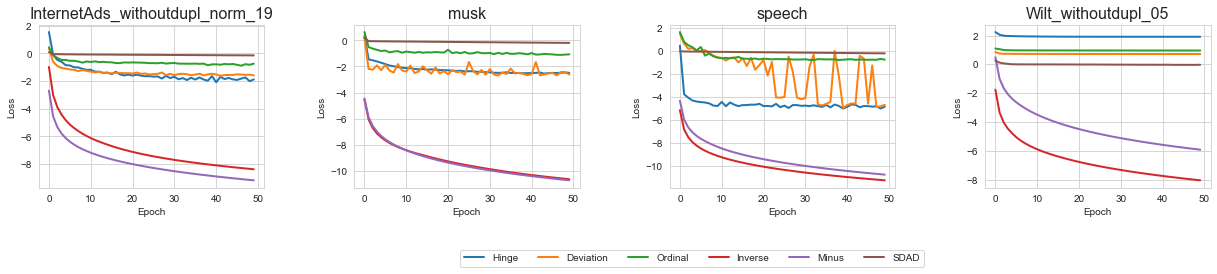

In [15]:
sns.set_style("whitegrid")

fig = plt.figure(figsize=(21,3))
for i, result_dict in enumerate(result_dict_list[:4]):
    fig.add_subplot(1, 4, i+1)
    for k,v in loss_name_dict.items():
#         if k not in ['Inverse', 'Minus']:
            loss = np.array(result_dict[v]['loss'])[:50]
            loss = np.sign(loss) * np.log(np.abs(loss))

            plt.plot(loss, label=k, linewidth=2)
            plt.xlabel('Epoch')
            plt.ylabel('Loss')
            plt.title(dataset_list[:4][i], fontsize=16)
    
    if i == 0:
        plt.legend(bbox_to_anchor=(3.95, -0.35), ncol=len(loss_name_dict))
        
    plt.subplots_adjust(wspace=0.4)
    
# plt.savefig('loss_comparison.png', dpi=600, bbox_inches="tight")

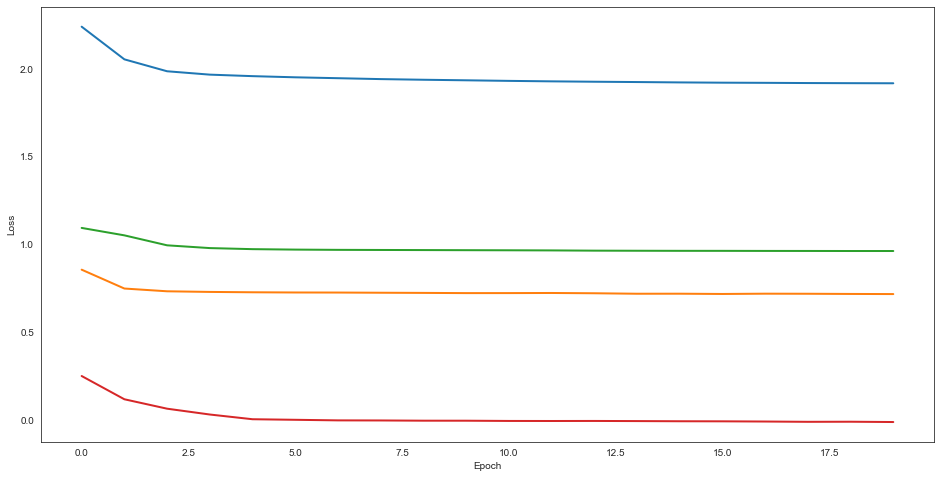

In [62]:
sns.set_style("white")

fig = plt.figure(figsize=(16,8))

for k,v in loss_name_dict.items():
    if k not in ['Inverse', 'Minus']:
        loss = np.array(result_dict[v]['loss'])[:20]
        loss = np.sign(loss) * np.log(np.abs(loss))

        plt.plot(loss, label=k, linewidth=2)
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
#     plt.title(dataset_list[:4][i], fontsize=16)

#     plt.legend(bbox_to_anchor=(3.95, -0.35), ncol=len(loss_name_dict))
        
#     plt.subplots_adjust(wspace=0.4)
    
# plt.savefig('loss_comparison.png', dpi=600, bbox_inches="tight")

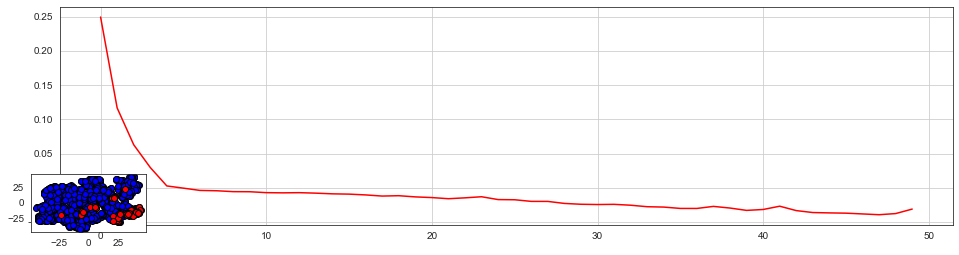

In [49]:
sns.set_style("white")


fig, ax1 = plt.subplots(figsize=(16,4))

# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.1, 0.1, 0.1, 0.2]
ax2 = fig.add_axes([left, bottom, width, height])

ax1.plot(loss, color='red')
ax1.grid()
ax2.scatter(X[y==0,0],X[y==0,1],color = 'blue',label = 'anomaly', edgecolors='k')
ax2.scatter(X[y==1,0],X[y==1,1],color = 'red',label = 'anomaly', edgecolors='k')
# ax2.set_xticks('')

plt.show()

# 参数变化

In [12]:
loss_name_list = ['inverse_loss', 'minus_loss', 'hinge_loss', 'deviation_loss', 'ordinal_loss', 'score_distribution_loss']

result_dict_list = np.load('result_dict_list.npz', allow_pickle=True)
result_dict_list = result_dict_list['data']

In [13]:
# 计算模型参数变动
def param_diff(model_init, model):
    model_init_params = model_init.state_dict()
    model_params = model.state_dict()
    
    diff = 0.0

    for i, k in enumerate(model_params.keys()):
        if i < 4:
            diff += torch.norm(model_params[k].float() - model_init_params[k].float())

    return diff.numpy()[()]

# 真实数据
df_param_diff = pd.DataFrame(data=None, index=dataset_list, columns=loss_name_dict.values())

for i, dataset in tqdm(enumerate(dataset_list)):
    for k,v in result_dict_list[i].items():
        df_param_diff.loc[dataset, k] = param_diff(model_init=v['model_init'], model=v['model'])

47it [00:00, 535.55it/s]


In [14]:
df_param_diff = df_param_diff.dropna()
df_param_diff

,hinge_loss,deviation_loss,ordinal_loss,inverse_loss,minus_loss,score_distribution_loss
10_cover,30.0963,14.3116,12.5706,134.801,161.006,2.43528
11_donors,22.5367,10.7405,9.13343,3.80273,73.3618,2.08409
12_fault,13.3626,7.24953,9.57467,3.78922,24.6618,0.571694
13_fraud,19.868,12.6086,10.5598,239.122,322.258,1.65909
14_glass,10.8188,7.47018,12.0117,3.38088,16.1671,0.724044
15_Hepatitis,13.2852,4.24917,8.95379,3.25777,18.002,0.631405
16_http,11.0024,5.09132,4.79608,104.41,11.0024,1.69167
17_InternetAds,18.5539,5.84164,3.82142,234.267,186.353,0.688551
18_Ionosphere,9.58918,5.5143,6.22497,3.05893,29.2901,0.384328
19_landsat,8.43752,3.65462,3.7446,4.04086,13.6257,1.25208


In [15]:
df_param_diff_log = df_param_diff.copy()
df_param_diff_log = df_param_diff_log[['hinge_loss', 'deviation_loss', 'ordinal_loss', 'inverse_loss', 'minus_loss', 'score_distribution_loss']]
for i in range(df_param_diff_log.shape[1]):
    df_param_diff_log.iloc[:, i] = df_param_diff_log.iloc[:, i].astype(float)
    df_param_diff_log.iloc[:, i] = np.log(df_param_diff_log.iloc[:, i].values)
    
df_param_diff_log.columns = loss_name_dict.keys()

Text(0, 0.5, 'Parameter Changes (log)')

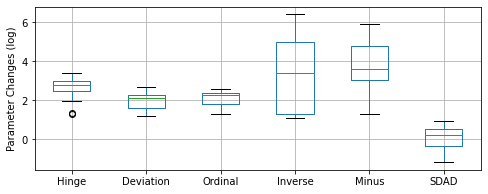

In [17]:
df_param_diff_log.boxplot(figsize=(8,3))
plt.ylabel('Parameter Changes (log)')
# plt.savefig('loss_comparison.png', dpi=600, bbox_inches="tight")

# Feature Embedding

D:\Anaconda37\lib\site-packages\sklearn\manifold\t_sne.py:347: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  error = np.finfo(np.float).max
D:\Anaconda37\lib\site-packages\sklearn\manifold\t_sne.py:348: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  best_error = np.finfo(np.float).max
D:\Anaconda37\lib\site-packages\sklearn\manifold\t_sne.

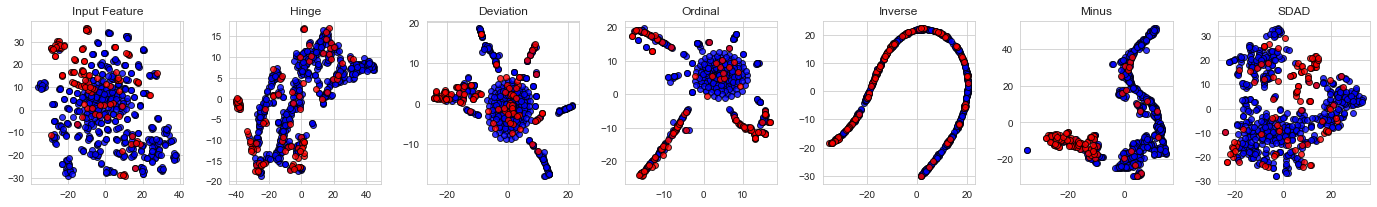

D:\Anaconda37\lib\site-packages\sklearn\manifold\t_sne.py:347: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  error = np.finfo(np.float).max
D:\Anaconda37\lib\site-packages\sklearn\manifold\t_sne.py:348: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  best_error = np.finfo(np.float).max
D:\Anaconda37\lib\site-packages\sklearn\manifold\t_sne.

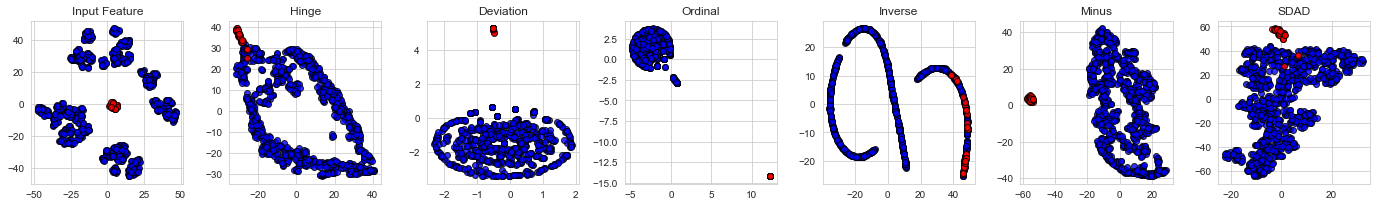

D:\Anaconda37\lib\site-packages\sklearn\manifold\t_sne.py:347: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  error = np.finfo(np.float).max
D:\Anaconda37\lib\site-packages\sklearn\manifold\t_sne.py:348: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  best_error = np.finfo(np.float).max
D:\Anaconda37\lib\site-packages\sklearn\manifold\t_sne.

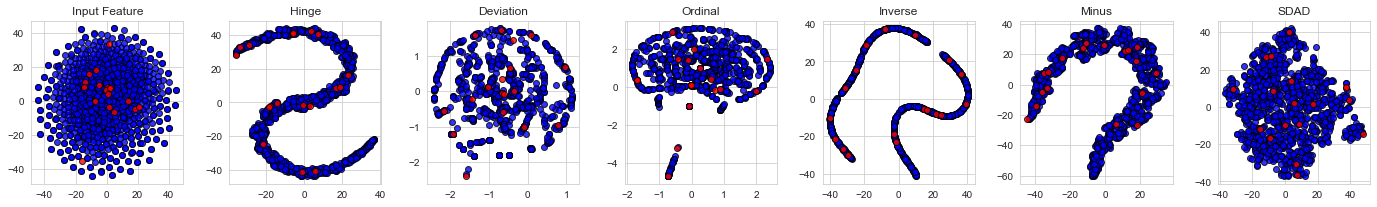

D:\Anaconda37\lib\site-packages\sklearn\manifold\t_sne.py:347: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  error = np.finfo(np.float).max
D:\Anaconda37\lib\site-packages\sklearn\manifold\t_sne.py:348: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  best_error = np.finfo(np.float).max
D:\Anaconda37\lib\site-packages\sklearn\manifold\t_sne.

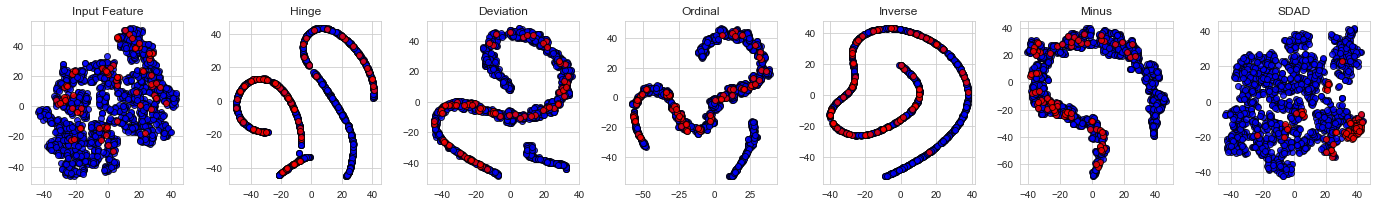

In [18]:
for n, result_dict in enumerate(result_dict_list):
    fig = plt.figure(figsize=(24,3))
    
    for i, (k,v) in enumerate(loss_name_dict.items()):
        if i == 0:
            fig.add_subplot(1, 7, 1)
            X = TSNE(n_components=2, random_state=42).fit_transform(result_dict[v]['data']['X_test'])
            y = result_dict[v]['data']['y_test']

            plt.scatter(X[y==0, 0], X[y==0, 1], c='b', edgecolor='k', alpha=0.8)
            plt.scatter(X[y==1, 0], X[y==1, 1], c='r', edgecolor='k', alpha=0.8)
            plt.title(f'Input Feature')
            
        fig.add_subplot(1, 7, i+2)
        X = TSNE(n_components=2, random_state=42).fit_transform(result_dict[v]['feature'])

        plt.scatter(X[y==0, 0], X[y==0, 1], c='b', edgecolor='k', alpha=0.8)
        plt.scatter(X[y==1, 0], X[y==1, 1], c='r', edgecolor='k', alpha=0.8)
#         plt.xlim(-20, 20)
#         plt.ylim(-20, 20)
        plt.title(k)
        
#     plt.suptitle(dataset_list[n], fontsize=20, y=1.1)
    plt.subplots_adjust(wspace=0.3)
    plt.savefig('embeddin_' + dataset_list[n] + '.png', dpi=150, bbox_inches="tight")
    
    plt.show()

# score distribution

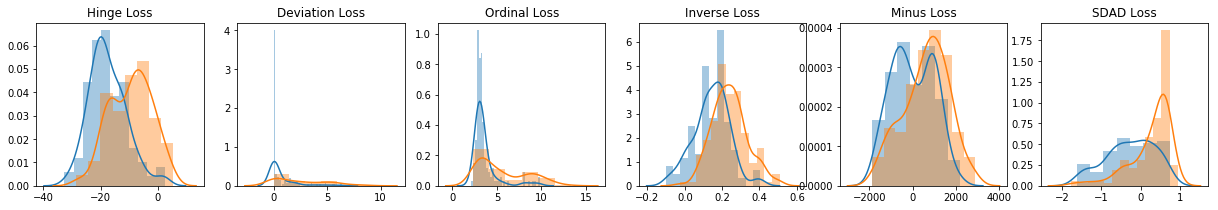

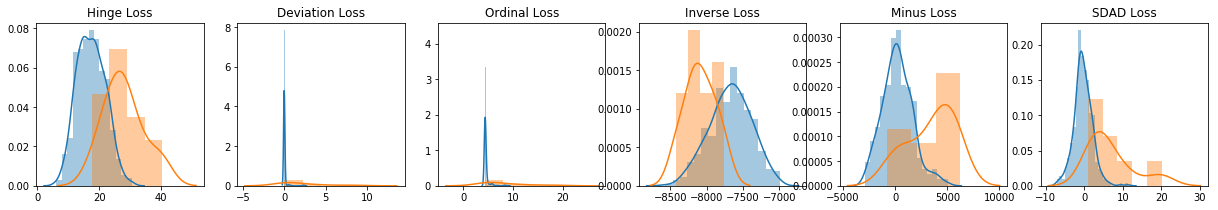

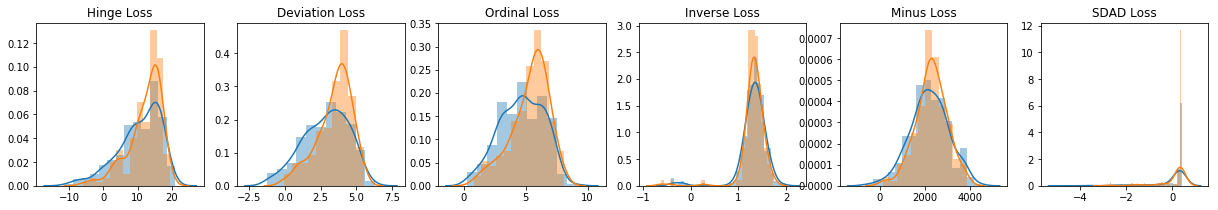

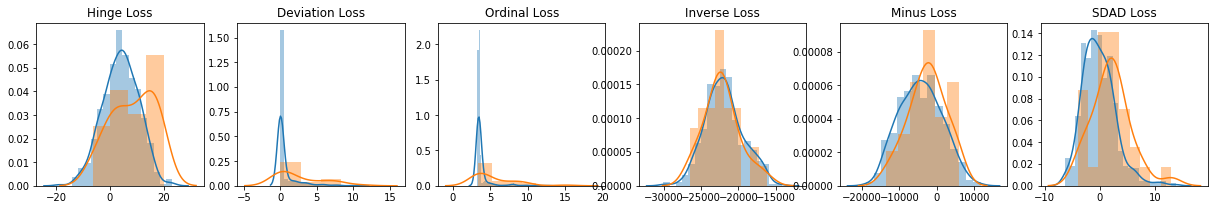

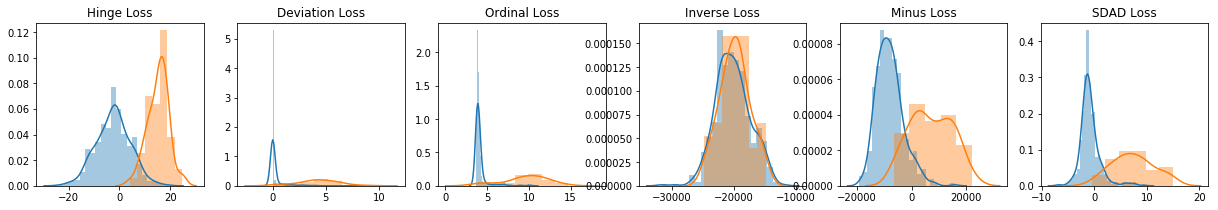

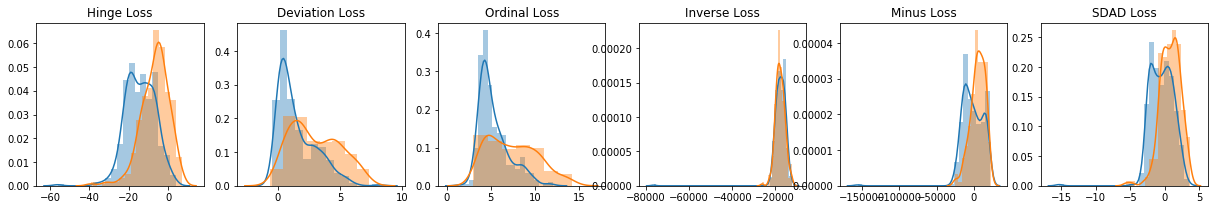

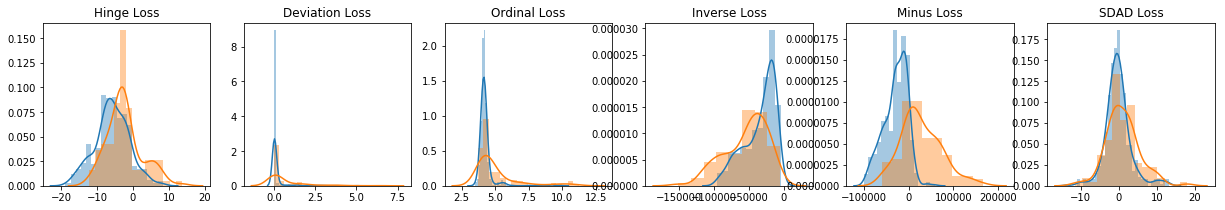

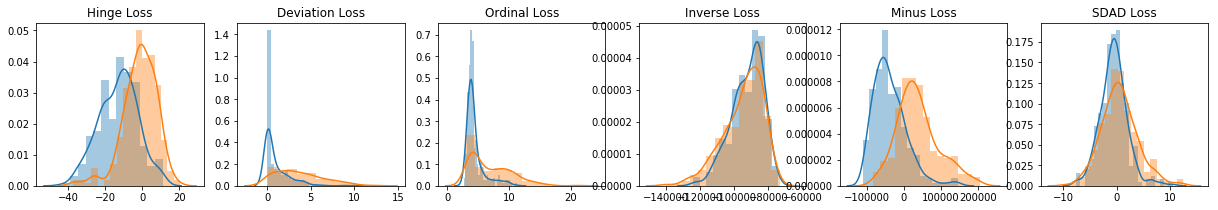

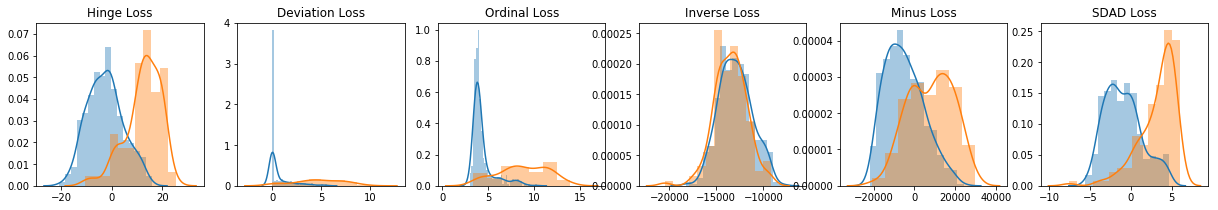

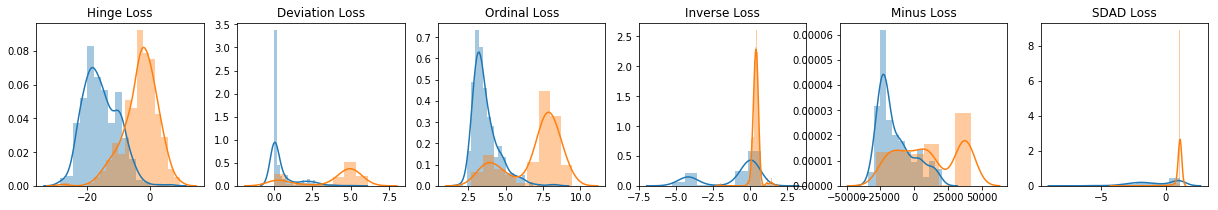

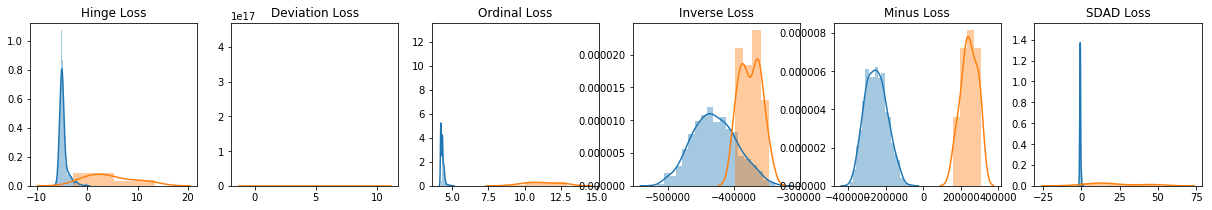

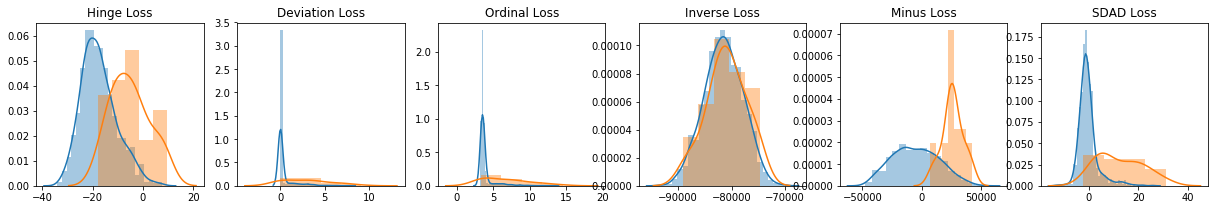

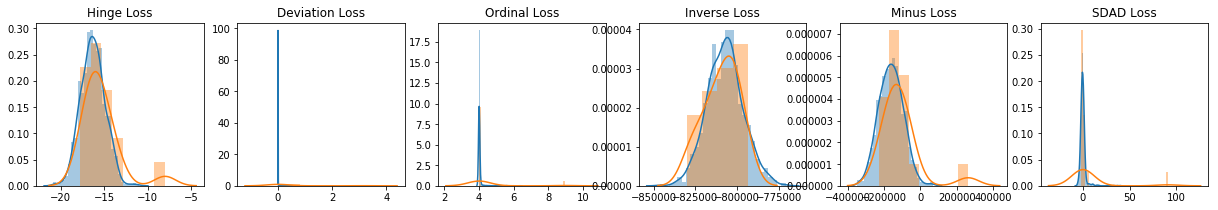

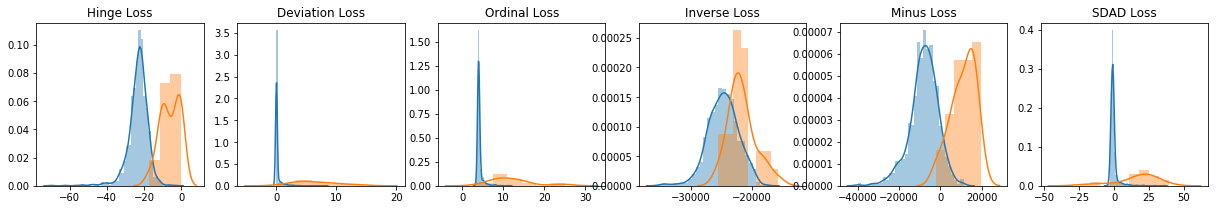

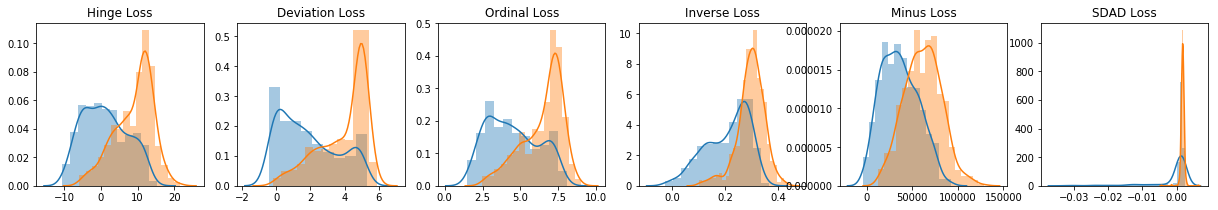

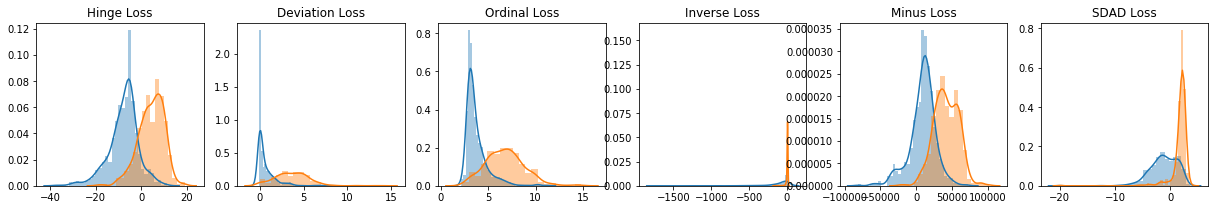

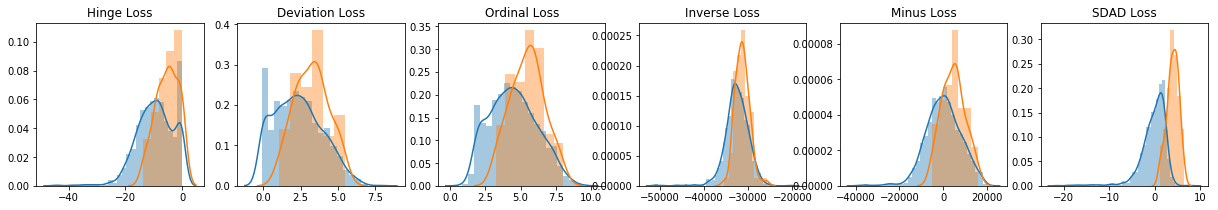

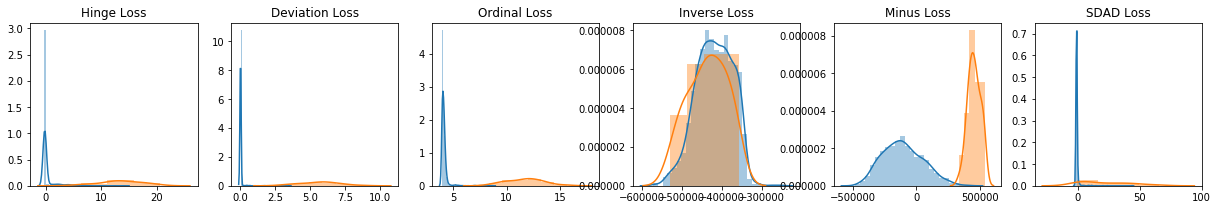

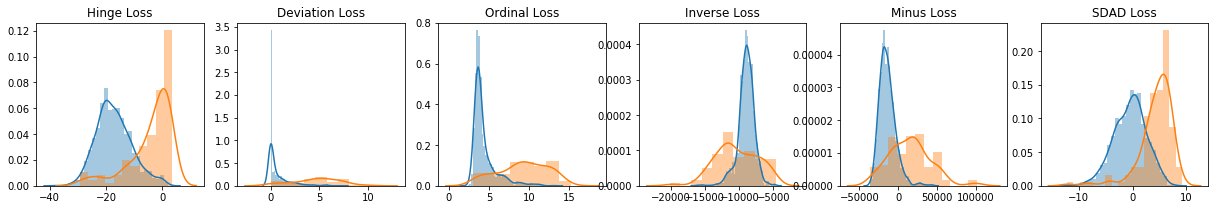

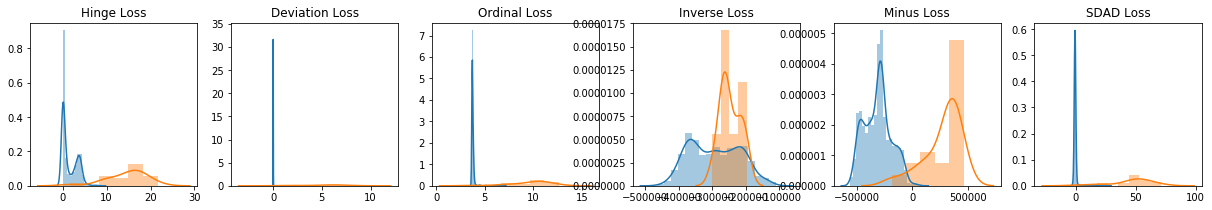

In [20]:
for result_dict in result_dict_list:
    fig = plt.figure(figsize=(21,3))
    # score distribution
    for i, (k,v) in enumerate(loss_name_dict.items()):
        fig.add_subplot(1, 6, i+1)
        score = result_dict[v]['score']
        y = result_dict[v]['data']['y_test']
        sns.distplot(score[y==0])
        sns.distplot(score[y==1])
        plt.title(k)

    plt.subplots_adjust(wspace=0.2)
    plt.show()

# 模拟数据上的性能

In [8]:
com = Comparison(epochs=200, lr=1e-3)

local outlier

In [9]:
result_dict = model_comparison(com, data=None, dataset=None, synthetic=True, synthetic_mode='Cluster')

df_performance = pd.DataFrame(data=None, index=result_dict.keys(), columns=['AUC-ROC', 'AUC-PR'])
for i in range(df_performance.shape[0]):
    loss_name = df_performance.index[i]
    
    df_performance.loc[loss_name, 'AUC-ROC'] = result_dict[loss_name]['performance']['aucroc']
    df_performance.loc[loss_name, 'AUC-PR'] = result_dict[loss_name]['performance']['aucpr']
    
df_performance

,AUC-ROC,AUC-PR
inverse_loss,0.998129,0.976812
minus_loss,1,1
hinge_loss,1,1
deviation_loss,1,1
ordinal_loss,1,1
score_distribution_loss,0,0.0270922


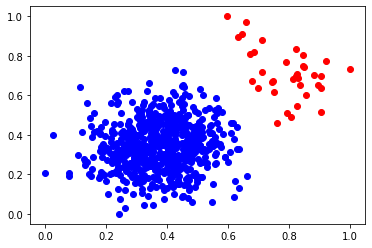

In [10]:
X = result_dict['score_distribution_loss']['data']['X_train']
y = result_dict['score_distribution_loss']['data']['y_train']

plt.scatter(X[y==0,0],X[y==0,1], c='b')
plt.scatter(X[y==1,0],X[y==1,1], c='r')
plt.show()

In [20]:
data = {'X_train': result_dict['score_distribution_loss']['data']['X_train'],
        'y_train': result_dict['score_distribution_loss']['data']['y_train'],
        'X_test': result_dict['score_distribution_loss']['data']['X_test'],
        'y_test': result_dict['score_distribution_loss']['data']['y_test'],}

In [25]:
from baseline.ADSD.run import adsd

model = adsd(seed=42, architecture='ResNet')
result = model.fit2test(data)

Epoch 000 | Validation metric: 0.0274 <<< BEST VALIDATION EPOCH
Epoch 001 | Validation metric: 0.0365 <<< BEST VALIDATION EPOCH
Epoch 002 | Validation metric: 0.2190 <<< BEST VALIDATION EPOCH
Epoch 003 | Validation metric: 0.6042 <<< BEST VALIDATION EPOCH
Epoch 004 | Validation metric: 0.8652 <<< BEST VALIDATION EPOCH
Epoch 005 | Validation metric: 0.9617 <<< BEST VALIDATION EPOCH
Epoch 006 | Validation metric: 0.9964 <<< BEST VALIDATION EPOCH
Epoch 007 | Validation metric: 1.0000 <<< BEST VALIDATION EPOCH
Epoch 008 | Validation metric: 1.0000
Epoch 009 | Validation metric: 1.0000
Epoch 010 | Validation metric: 1.0000
Epoch 011 | Validation metric: 1.0000
Epoch 012 | Validation metric: 1.0000
Epoch 013 | Validation metric: 1.0000
Epoch 014 | Validation metric: 1.0000
Epoch 015 | Validation metric: 1.0000
Epoch 016 | Validation metric: 1.0000
Epoch 017 | Validation metric: 1.0000
Epoch 018 | Validation metric: 1.0000


In [34]:
sum(data['y_train']) / len(data['y_train'])

0.05

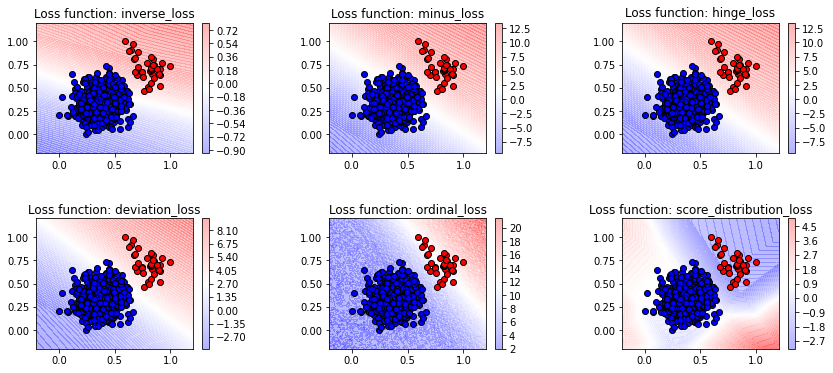

In [11]:
#visualize the decision boundary
xlim_l = np.min(X[:, 0]) - 0.2
xlim_u = np.max(X[:, 0]) + 0.2

ylim_l = np.min(X[:, 1]) - 0.2
ylim_u = np.max(X[:, 1]) + 0.2


xx, yy = np.meshgrid(np.linspace(xlim_l, xlim_u, 100),np.linspace(ylim_l, ylim_u, 100))
xxyy = np.c_[xx.ravel(), yy.ravel()]

# only for implemenetation, not real
l = np.random.choice([0,1], xxyy.shape[0])

result_dict = model_comparison(com, data={'X_train':X, 'X_test':xxyy, 'y_train':y, 'y_test':l})

fig = plt.figure(figsize=(14,6))
for i, (k,v) in enumerate(result_dict.items()):
    score = v['score']
#     score = (score - np.min(score)) / (np.max(score) - np.min(score))
    
    fig.add_subplot(2, 3, i+1)
    #决策边界
    plt.contourf(xx, yy, score.reshape(xx.shape), 100, cmap='bwr', alpha=0.3)
    plt.colorbar()

    plt.scatter(X[y==0,0],X[y==0,1],color = 'blue',label = 'normal', edgecolors='k')
    plt.scatter(X[y==1,0],X[y==1,1],color = 'red',label = 'anomaly', edgecolors='k')
    plt.title(f'Loss function: {k}')
    
plt.subplots_adjust(wspace=0.5, hspace=0.5)

Gaussian mixture outlier

In [24]:
result_dict = model_comparison(com, data=None, dataset=None, synthetic=True, synthetic_mode='GM')

df_performance = pd.DataFrame(data=None, index=result_dict.keys(), columns=['AUC-ROC', 'AUC-PR'])
for i in range(df_performance.shape[0]):
    loss_name = df_performance.index[i]
    
    df_performance.loc[loss_name, 'AUC-ROC'] = result_dict[loss_name]['performance']['aucroc']
    df_performance.loc[loss_name, 'AUC-PR'] = result_dict[loss_name]['performance']['aucpr']
    
df_performance

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [ ]:
X = result_dict['score_distribution_loss']['data']['X_train']
y = result_dict['score_distribution_loss']['data']['y_train'][:,0]

plt.scatter(X[y==0,0],X[y==0,1], c='b')
plt.scatter(X[y==1,0],X[y==1,1], c='r')
plt.show()

In [ ]:
#visualize the decision boundary
xlim_l = np.min(X[:, 0]) - 0.2
xlim_u = np.max(X[:, 0]) + 0.2

ylim_l = np.min(X[:, 1]) - 0.2
ylim_u = np.max(X[:, 1]) + 0.2


xx, yy = np.meshgrid(np.linspace(xlim_l, xlim_u, 100),np.linspace(ylim_l, ylim_u, 100))
xxyy = np.c_[xx.ravel(), yy.ravel()]

# only for implemenetation, not real
l = np.random.choice([0,1], xxyy.shape[0])

result_dict = model_comparison(data={'X_train':X, 'X_test':xxyy, 'y_train':y, 'y_test':l})

fig = plt.figure(figsize=(14,6))
for i, (k,v) in enumerate(result_dict.items()):
    score = v['score']
#     score = (score - np.min(score)) / (np.max(score) - np.min(score))
    
    fig.add_subplot(2, 3, i+1)
    #决策边界
    plt.contourf(xx, yy, score.reshape(xx.shape), 100, cmap='bwr', alpha=0.3)
    plt.colorbar()

    plt.scatter(X[y==0,0],X[y==0,1],color = 'blue',label = 'normal', edgecolors='k')
    plt.scatter(X[y==1,0],X[y==1,1],color = 'red',label = 'anomaly', edgecolors='k')
    plt.title(f'Loss function: {k}')
    
plt.subplots_adjust(wspace=0.5, hspace=0.5)